# Visualize ECG Data with Participant Trends
This notebook processes ECG data to visualize average heart rate across different conditions and connects individual participant data points with distinguishable lines.

In [2]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data
Load the `.csv` file containing the summary of ECG results.

In [3]:
# Paths to folders
results_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/results/'

# Load the .csv file
filename = results_folder + 'ecg_results.csv'
results = pd.read_csv(filename)

# Display the data
results.head()

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,Participant,Condition
0,63.527690,[[944.7311828]],[[32.01592164]],[[14.6882973]],[[29.10430538]],[[nan]],[[nan]],[[nan]],[[nan]],[[26.80439657]],...,[[1.3151047]],[[1.49486146]],[[1.35535357]],[[1.85949091]],[[1.72921375]],[[1.90260203]],[[2.1296869]],[[0.89172846]],sub-1,baseline
1,62.102044,[[966.50526316]],[[48.22256024]],[[22.30588058]],[[41.99462901]],[[nan]],[[nan]],[[nan]],[[nan]],[[35.86976738]],...,[[1.14199487]],[[1.42905843]],[[1.32328207]],[[1.74951777]],[[1.66145408]],[[1.84954336]],[[2.03764041]],[[0.99603363]],sub-1,spiderhand
2,62.968659,[[954.22488038]],[[89.32988858]],[[33.53623915]],[[47.21229047]],[[nan]],[[nan]],[[nan]],[[nan]],[[114.95532159]],...,[[0.80137517]],[[1.20992982]],[[1.28242526]],[[1.60232099]],[[1.05785144]],[[1.9055163]],[[1.82154703]],[[0.77442364]],sub-1,spidervideo
3,75.492160,[[794.61471861]],[[44.24195874]],[[6.44176759]],[[42.89150068]],[[nan]],[[nan]],[[nan]],[[nan]],[[26.61210905]],...,[[0.96423502]],[[1.43815005]],[[1.46910685]],[[1.95596418]],[[1.73223031]],[[1.62911687]],[[2.82703473]],[[0.78177588]],sub-2,baseline
4,73.902793,[[812.00442478]],[[55.36436863]],[[49.73056139]],[[36.82170681]],[[nan]],[[nan]],[[nan]],[[nan]],[[20.43297988]],...,[[0.73652777]],[[1.31502206]],[[1.18225343]],[[1.64016431]],[[1.6516697]],[[1.64069936]],[[2.29405608]],[[0.4498333]],sub-2,spiderhand


## Filter Data by Condition
Separate the data into `baseline`, `spiderhand`, and `spidervideo` conditions.

In [4]:
# Filter rows for each condition
baseline = results[results['Condition'] == 'baseline']
spiderhand = results[results['Condition'] == 'spiderhand']
spidervideo = results[results['Condition'] == 'spidervideo']

# Calculate mean values for each condition
conditions = ['Baseline', 'Spiderhand', 'Spidervideo']
averages = [baseline['ECG_Rate_Mean'].mean(), 
            spiderhand['ECG_Rate_Mean'].mean(), 
            spidervideo['ECG_Rate_Mean'].mean()]

# Display means
averages

[np.float64(71.69273545062038),
 np.float64(68.91967193740551),
 np.float64(69.3530170714247)]

## Define Plot Colors and Styles
Set up color schemes, line styles, and marker styles for visualization.

In [8]:
# Define colors and styles
bar_colors = ['#fde725', '#21918c', '#31688e']
line_styles = ['-', '--', ':']  # Solid, dashed, dotted
marker_styles = ['o', 's', '^']  # Circle, square, triangle

## Create Plot
Visualize the data using a bar chart with scatter plots and connect individual participant data points with distinct lines.

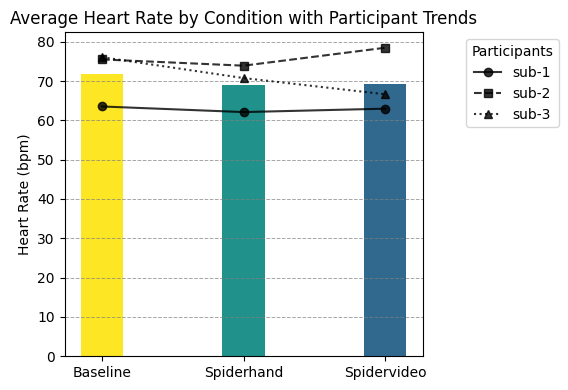

In [10]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot
ax.bar(conditions, averages, color=bar_colors, width=0.3)

# Plot participant data
participants = results['Participant'].unique()

for i, participant in enumerate(participants):
    # Filter participant data
    participant_data = results[results['Participant'] == participant]
    participant_bpm = [
        participant_data[participant_data['Condition'] == 'baseline']['ECG_Rate_Mean'].values[0],
        participant_data[participant_data['Condition'] == 'spiderhand']['ECG_Rate_Mean'].values[0],
        participant_data[participant_data['Condition'] == 'spidervideo']['ECG_Rate_Mean'].values[0]
    ]
    
    # Plot lines and markers for participant
    ax.plot(
        conditions,
        participant_bpm,
        marker=marker_styles[i % len(marker_styles)], 
        linestyle=line_styles[i % len(line_styles)], 
        color='black', 
        label=participant,
        alpha=0.8,
        linewidth=1.5
    )

# Add labels, title, and legend
ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Average Heart Rate by Condition with Participant Trends')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title='Participants')

# Add grid lines
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# Save the plot
figure_filename = results_folder + 'ecg_summary_with_lines.pdf'
plt.tight_layout()
plt.subplots_adjust(right=0.7)
plt.savefig(figure_filename, bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()